In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# Import the data

In [52]:
df = pd.read_csv("1ResearchProjectData.csv")

# Preprocess the data

## Replace the name of teacher with 1, 2 or 3
 Ruger = 1
 Wesson = 2
 Smith = 3
## Replace lunch status with 0 and 1
 Free lunch = 0
 Paid lunch = 1
## Replace Gender with 1's and 0's
 Female = 0
 Male = 1
## Replace ethinicity with 1 through 4
 African American = 1
 Hispanic = 2
 Caucasian = 3
 Asian = 4


In [53]:
df = df.drop(columns=['wesson'])
df = df.drop(columns=['Student'])
df = df.dropna()
# Teacher
df.replace('Ruger',1,inplace=True)
df.replace('Wesson',2,inplace=True)
df.replace('Smith',3,inplace=True)

# Lunch status
df.replace('Free lunch',0,inplace=True)
df.replace('Paid lunch',1,inplace=True)

# Gender:
df.replace('Female',0,inplace=True)
df.replace('Male',1,inplace=True)

#Ethnicity
df.replace('African-American',1,inplace=True)
df.replace('Hispanic',2,inplace=True)
df.replace('Caucasian',3,inplace=True)
df.replace('Asian',4,inplace=True)

In [54]:
CorrM = df.corr()
CorrM.style.background_gradient(cmap='coolwarm').set_precision(2)


/var/folders/td/4gbkcr014tv3dc_zms9z1h4m0000gn/T/ipykernel_20803/1092744638.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  CorrM.style.background_gradient(cmap='coolwarm').set_precision(2)


,Teacher,Gender,Ethnic,Freeredu,Score
Teacher,1.00,0.04,0.07,0.08,0.36
Gender,0.04,1.00,-0.06,0.01,-0.13
Ethnic,0.07,-0.06,1.00,0.03,-0.01
Freeredu,0.08,0.01,0.03,1.00,-0.04
Score,0.36,-0.13,-0.01,-0.04,1.00


# Training test split

In [77]:
X = pd.DataFrame(df, columns=['Gender', 'Ethnic', 'Freeredu','Score'])
y = pd.DataFrame(df, columns=['Teacher'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# KNN Classifier:

In [80]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train.values.ravel())
yPred = knn.predict(X_test)

MSE = mean_squared_error(y_true=y_test.values.ravel(),y_pred=yPred)

score = knn.score(X_test,y_test.values.ravel())

print("The MSE for this model is {} and the accuracy is {}".format(MSE,score))



The MSE for this model is 1.2615384615384615 and the accuracy is 0.38461538461538464


## Conduct bootstrapping

### Take the KNN classifer and apply grid search to find the best params:

In [81]:
n = np.arange(1, 20, 1)
p = np.arange(1,3,1)

params = { 'n_neighbors' : n, 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'p': p  }# The param we want to figure out using the grid search
kNN = KNeighborsClassifier()
kNN_gscv = GridSearchCV(kNN, params, cv=5)# Grid search with five fold cross validation
#fit model to data
kNN_gscv.fit(X_train, y_train.values.ravel())
print(kNN_gscv.best_params_)

{'algorithm': 'brute', 'n_neighbors': 14, 'p': 1}


### Re Train the KNN clssifier with these new params:


In [82]:
knn = KNeighborsClassifier(n_neighbors=14,algorithm='brute',p=1)

knn.fit(X_train,y_train.values.ravel())
yPred = knn.predict(X_test)

MSE = mean_squared_error(y_true=y_test,y_pred=yPred)

score = knn.score(X_test,y_test.values.ravel())

print("The MSE for this model is {} and the accuracy is {}".format(MSE,score))

The MSE for this model is 1.0769230769230769 and the accuracy is 0.38461538461538464


### Now use bootstrapping to get an average for the accuracy of the model

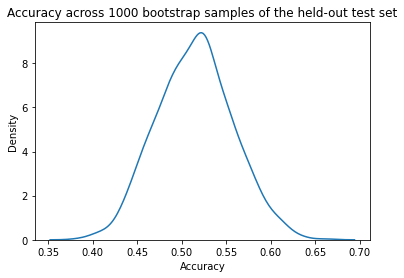

In [85]:
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = knn.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

# Random Forest Classifier

In [38]:
rfc = RandomForestClassifier(max_depth=9,n_estimators=100,ccp_alpha=0.002)
rfc.fit(X_train,y_train.values.ravel())

score = rfc.score(X_test,y_test.values.ravel())

score


0.47692307692307695

## Accuracy is extremely low. Use grid search again to find the best values:

In [39]:
depth = np.arange(1,50,2)
est = np.arange(10,200,10)
ccp_alpha = 0.001*np.arange(0,10,2)
rfc = RandomForestClassifier()

params = {'max_depth' : depth, 'n_estimators' : est, 'ccp_alpha' : ccp_alpha}
rfc_gscv = GridSearchCV(rfc, params, cv=5)# Grid search with five fold cross validation
#fit model to data
rfc_gscv.fit(X_train, y_train.values.ravel())
print(rfc_gscv.best_params_)

{'ccp_alpha': 0.008, 'max_depth': 1, 'n_estimators': 60}


## Retrain using the new best params

In [40]:
rfc = RandomForestClassifier(max_depth=1,ccp_alpha=0.008,n_estimators=60)

rfc.fit(X_train,y_train.values.ravel())

score = rfc.score(X_test,y_test.values.ravel())

score

0.5230769230769231